In [12]:
import numpy as np
import platform
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from os import listdir
import os
import cv2
import random
import copy

In [13]:
def load_directory(f_name):
    #print ("in file " + f_name)
    loaded_images = {}
    labels_list = []
    loaded_images_list = []
    dir = os.listdir('/Users/mohamedbasuony/desktop/flower_photos')
    if '.DS_Store' in dir:
        dir.remove('.DS_Store')
    for filename in listdir('/Users/mohamedbasuony/desktop/flower_photos/' + f_name):
        # load image
        img_data = plt.imread('/Users/mohamedbasuony/desktop/flower_photos/' + f_name + '/' + filename)
        new_img = cv2.resize(img_data,
                             dsize=(32, 32),  # 32 x 32 images
                             interpolation=cv2.INTER_CUBIC)
        loaded_images[filename] = new_img
        sorted_loaded_images = dict(
            sorted(loaded_images.items(), key=lambda x: x[0].lower()))
    for key in (sorted_loaded_images):
        labels_list.append(f_name)
        loaded_images_list.append(loaded_images[key])
    ret = np.array(loaded_images_list)
    labels = np.array(labels_list)
    testing_batch = ret[-100:]
    testing_batch_labels = labels[-100:]
    validation_batch = ret[-200:-100]
    validation_batch_labels = labels[-200:-100]
    training_batch = ret[:-200].copy()
    training_batch_labels = labels[:-200].copy()
    return testing_batch, training_batch, testing_batch_labels, training_batch_labels, validation_batch,validation_batch_labels

training_data = []
testing_data = []
training_labels = []
testing_labels = []
validation_data = []
validation_labels=[]

for directoryname in listdir('/Users/mohamedbasuony/desktop/flower_photos/'):
    print('in directory:' + directoryname)
    testing_batch, training_batch, testing_batch_labels, training_batch_labels,validation_batch,validation_batch_labels = load_directory(
        directoryname)
    testing_data.extend(testing_batch)
    testing_labels.extend(testing_batch_labels)
    training_data.extend(training_batch)
    training_labels.extend(training_batch_labels)
    
    validation_data.extend(validation_batch)
    validation_labels.extend(validation_batch_labels)
    
testing_data = np.array(testing_data)
testing_data = np.reshape(testing_data , (testing_data.shape[0], -1))
training_data = np.array(training_data)
training_data = np.reshape(training_data , (training_data.shape[0], -1))
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

validation_labels = np.array(validation_labels)
validation_data = np.array (validation_data)
validation_data = np.reshape(validation_data , (validation_data.shape[0], -1))

in directory:roses
in directory:sunflowers
in directory:daisy
in directory:dandelion
in directory:tulips


In [15]:
def mix_data(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a , b

np.random.seed(17) 
daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
training_data,training_labels=mix_data(training_data,training_labels)
validation_data,validation_labels=mix_data(validation_data,validation_labels)

training_labels[training_labels == 'daisy'] = 0
training_labels[training_labels == 'dandelion'] = 1
training_labels[training_labels == 'roses'] = 2
training_labels[training_labels == 'sunflowers'] = 3
training_labels[training_labels == 'tulips'] = 4

testing_labels[testing_labels == 'daisy'] = 0
testing_labels[testing_labels == 'dandelion'] = 1
testing_labels[testing_labels == 'roses'] = 2
testing_labels[testing_labels == 'sunflowers'] = 3
testing_labels[testing_labels == 'tulips'] = 4

validation_labels[validation_labels == 'daisy'] = 0
validation_labels[validation_labels == 'dandelion'] = 1
validation_labels[validation_labels == 'roses'] = 2
validation_labels[validation_labels == 'sunflowers'] = 3
validation_labels[validation_labels == 'tulips'] = 4

training_labels = training_labels.astype('int32')
testing_labels = testing_labels.astype('int32')
validation_labels = validation_labels.astype('int32')



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [17]:

w = 32 
K = 5 
D = w * w * 3 
print (D)
W =  np.random.randn(D,K)/ np.sqrt(D) 
b = np.zeros((1,K))
step_size = 1e-0
reg = 1e-6 
X = training_data.astype('float64')
y = training_labels
X -= np.mean (X , axis = 0 )
X /= np.std (X , axis = 0 )
X/= 255.0
print (X)
num_examples = training_data.shape[0]
all_loss=[]
for i in range(10000):
    scores = np.dot(X, W) + b
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    all_loss.append(loss)
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples


    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W 


    W += -step_size * dW
    b += -step_size * db

3072
[[-4.40296930e-03 -4.41027494e-03 -3.47690537e-03 ... -3.18035633e-03
  -3.10636137e-03 -2.96712823e-03]
 [ 3.19177733e-03 -1.54871235e-03 -2.91801609e-03 ...  2.20318566e-03
  -2.30760655e-03 -2.79722290e-03]
 [ 4.72058996e-03  2.09327638e-03  9.01060705e-04 ... -2.64733237e-03
  -2.82109179e-03 -1.55125049e-03]
 ...
 [-4.99476774e-03 -5.29475791e-03 -4.03579466e-03 ... -4.45961383e-03
  -4.81797886e-03 -3.36357399e-03]
 [-3.17005589e-03 -2.17305328e-03 -2.26597858e-03 ... -2.59402997e-03
  -1.68001347e-03 -2.00433137e-03]
 [ 3.55189887e-05  1.00067976e-03  2.02449097e-04 ... -2.43412278e-03
  -2.19349871e-03 -1.94769626e-03]]
iteration 0: loss 1.609268
iteration 1000: loss 1.447209
iteration 2000: loss 1.375594
iteration 3000: loss 1.330926
iteration 4000: loss 1.299614
iteration 5000: loss 1.275928
iteration 6000: loss 1.257045
iteration 7000: loss 1.241413
iteration 8000: loss 1.228103
iteration 9000: loss 1.216522


In [23]:
class NN_FC ():
    def __init__ (self,n_layers):
        self.n_layers= n_layers
        self.h = []
        self.Best_W = {} 
        self.Best_b = {} 
        self.Best_val_acc = 0
    
    def define_layers (self,h): 
        if (len(h) != self.n_layers):
            print('the length is not suitable')
        else:
            self.h = h
    
    def run(self,training_data = training_data , training_labels = training_labels ,
                validation_data = validation_data , validation_labels = validation_labels,
                D=3072 , K=5 , lr = 1e-0 , reg = 1e-3 , epochs = 100):
        n_layers = self.n_layers
        reg = reg
        learning_rate = lr
        h = self.h
        weights = {}
        bias = {}
        
        weights[0] = np.random.randn(D,h[0])/ np.sqrt(D)
        bias[0]= np.zeros((1,h[0]))
        weights[n_layers]= np.random.randn(h[n_layers-1], K)/ np.sqrt(h[n_layers-1])
        bias[n_layers]= np.zeros((1,K))
        

        for i in range (1,n_layers):
            weights[i] = np.random.randn(h[i-1],h[i])/ np.sqrt(h[i-1])
            bias[i]= np.zeros((1,h[i]))
    
        X = training_data.astype('float64')
        y = training_labels


        X -= np.mean (X , axis = 0 )
        X/= 255.0

        validation_d = validation_data.astype('float64')
        validation_d -= np.mean (validation_data , axis = 0 )

        validation_d /= 255.0
        num_examples = X.shape[0]
        all_loss=[]
        all_validation_loss = []
        prev_val_acc = 0
        hidden_layers= {}
        hidden_layers[0] = np.maximum(0, np.dot(X, weights[0]) + bias[0])
        validation_hidden_layers={}
        for epoch in range(epochs): #10 epochs

            for i in range (1 , n_layers):
                tmp_h = np.maximum(0, np.dot(hidden_layers[i-1], weights[i]) + bias[i])
                hidden_layers[i] =  tmp_h

                
            scores = np.dot(hidden_layers[n_layers-1], weights[n_layers]) + bias[n_layers]
            training_predicted_class = np.argmax(scores, axis=1)
            training_acc = np.mean(training_predicted_class == y)
            
            validation_hidden_layers[0]= np.maximum(0, np.dot(validation_d, weights[0]) + bias[0]) # note, ReLU activation
            #evaluate validation accuracy
            for i in range (1 , n_layers):
                validation_hidden_layers[i]= np.maximum(0, np.dot(validation_hidden_layers[i-1], weights[i]) + bias[i])
            
           
            validation_scores = np.dot(validation_hidden_layers[n_layers-1], weights[n_layers]) + bias[n_layers]

            validation_predicted_class = np.argmax(validation_scores, axis=1)
            validation_acc = np.mean(validation_predicted_class == validation_labels)

            
            scores -= np.max(scores) 
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 

           
            correct_logprobs = -np.log(probs[range(num_examples),y])
            data_loss = np.sum(correct_logprobs)/num_examples
            reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3) 
            loss = data_loss + reg_loss
            all_loss.append(loss)

            # compute validation scores 
            validation_scores -= np.max(validation_scores) # to avoid numerical blowup
            exp_validation_scores = np.exp(validation_scores)

            validation_probs = exp_validation_scores / np.sum(exp_validation_scores, axis=1, keepdims=True) 
            validation_num_examples = validation_data.shape[0]
            validation_correct_logprobs = -np.log(validation_probs[range(validation_num_examples),validation_labels])
            
            validation_data_loss = np.sum(validation_correct_logprobs)/validation_num_examples
            validation_loss = validation_data_loss + reg_loss
            all_validation_loss.append(validation_loss)

            
            print ("Epoch %d: Tr_loss: %f, val_loss: %f ,Tr_acc: %f ,val_acc: %f ,lr: %f ,Reg:%f" % (epoch, loss , validation_loss , training_acc , validation_acc , learning_rate , reg ))

            dscores = probs
            dscores[range(num_examples),y] -= 1
            dscores /= num_examples
            
            dweights = {}
            dbias = {}
            dhidden = {}

            dweights[n_layers] = (np.dot (hidden_layers[n_layers-1].T , dscores))
            dbias[n_layers] = (np.sum(dscores, axis=0, keepdims=True))
            dhidden[n_layers-1] =(np.dot(dscores , weights[n_layers].T))
            if (hidden_layer[n_layers-1].any() <= 0):
                dhidden[n_layers-1] = 0
            for i in reversed(range (1,n_layers)):
                dweights[i] =np.dot (hidden_layers[i-1].T , dhidden[i]) 
                dbias[i]=np.sum(dhidden[i], axis=0, keepdims=True)
                dhidden[i-1] = np.dot(dhidden[i], weights[i].T)
                if(hidden_layers[i-1].any()<=0):
                    dhidden[i-1]=0
            
            dweights[0]= np.dot(X.T , dhidden[0])
            dbias[0]=np.sum(dhidden[0] , axis = 0 , keepdims=True)
   
            for i in range ( 0 , n_layers+1):
            
                dweights[i] += reg * weights[i]

            if (validation_acc > prev_val_acc):
                prev_val_acc = validation_acc
                Best_W = copy.deepcopy(weights)
                Best_b = copy.deepcopy(bias)
                Best_val_acc = copy.deepcopy(validation_acc)

            for  i in range (0 , n_layers +1 ):
                weights[i] += -learning_rate * dweights[i]
                bias[i] += -learning_rate * dbias[i]
                

NN = NN_FC (2)
NN.define_layers ([1000,1000])
NN.run(lr= 5e-03 , epochs = 50)


Epoch 0:Tr_loss: 2.607151, val_loss: 2.612527 ,Tr_acc: 0.220599 , val_acc: 0.210000 , lr: 0.050000 , Reg:0.001000
Epoch 1:Tr_loss: 2.596053, val_loss: 2.605775 ,Tr_acc: 0.263670 , val_acc: 0.226000 , lr: 0.050000 , Reg:0.001000
Epoch 2:Tr_loss: 2.585872, val_loss: 2.599448 ,Tr_acc: 0.285019 , val_acc: 0.264000 , lr: 0.050000 , Reg:0.001000
Epoch 3:Tr_loss: 2.576406, val_loss: 2.593419 ,Tr_acc: 0.299251 , val_acc: 0.290000 , lr: 0.050000 , Reg:0.001000
Epoch 4:Tr_loss: 2.567511, val_loss: 2.587607 ,Tr_acc: 0.314232 , val_acc: 0.304000 , lr: 0.050000 , Reg:0.001000
Epoch 5:Tr_loss: 2.559090, val_loss: 2.581947 ,Tr_acc: 0.323970 , val_acc: 0.306000 , lr: 0.050000 , Reg:0.001000
Epoch 6:Tr_loss: 2.551043, val_loss: 2.576398 ,Tr_acc: 0.336704 , val_acc: 0.312000 , lr: 0.050000 , Reg:0.001000
Epoch 7:Tr_loss: 2.543315, val_loss: 2.570946 ,Tr_acc: 0.346442 , val_acc: 0.314000 , lr: 0.050000 , Reg:0.001000
Epoch 8:Tr_loss: 2.535852, val_loss: 2.565561 ,Tr_acc: 0.356929 , val_acc: 0.316000 , lr

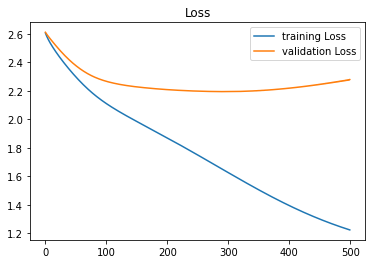

In [24]:
plt.plot(all_loss ,label = 'training Loss')
plt.plot (all_validation_loss , label='validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [32]:
#running test set and calculating the ACCR
testing_d = testing_data.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('testing accuracy is : %.2f ' % (np.mean(predicted_class == testing_labels)*100) +'%')

testing accuracy is : 54.40 %


In [33]:
#calculating individual classes and calculating the CCRNA
#daisy
testing_d = daisy.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('Daisy accuracy: %.2f ' % (np.mean(predicted_class == daisy_lbls)*100) +'%')
testing_d = dandelion.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('dandelion accuracy: %.2f ' % (np.mean(predicted_class == dandelion_lbls)*100) +'%')
testing_d = roses.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('roses accuracy: %.2f ' % (np.mean(predicted_class == roses_lbls)*100) +'%')
testing_d = sunflowers.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('sunflowers accuracy: %.2f ' % (np.mean(predicted_class == sunflowers_lbls)*100) +'%')
testing_d = tulips.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('tulips accuracy: %.2f ' % (np.mean(predicted_class == tulips_lbls)*100) +'%')

Daisy accuracy: 36.00 %
dandelion accuracy: 73.00 %
roses accuracy: 42.00 %
sunflowers accuracy: 68.00 %
tulips accuracy: 53.00 %
